# Lec. 1

## Examples

- https://youtu.be/xwXPipYmJ9A

- https://youtu.be/JFTJ2SS4xyA

- https://youtu.be/XWhGjxdug0o

- https://youtu.be/15DIidigArA

- https://youtu.be/6UKOWhIRKEw

- TCP flow control

### ODE

$$y(t)  = \mathbf{A}x(t), \quad t\ge 0$$

$$ a_n y^{(n)} + a_{n-1} y^{(n-1)} + \dots + a_1 y' + a_0 y = b_m x^{(m)} + b_{m-1} x^{(m-1)} + \dots + b_1 x' + b_0 x$$


### Laplace Transform

Let $\exists s_0 $, $ \ |f(t)| \ge M e^{s_0 t }, \forall t$, 

$$
L[f(t)] = F(s) = \int_{-0}^{\infty} f(t) e^{-st}, \quad s\in \mathbb{C}
$$


Main properties:

1. Linearity,
2. $L[f(\lambda t)] = \frac{1}{\lambda} F\left(\frac{s}{\lambda}\right) $, $\lambda > 0$,
3.  $L[e^{at} f(\lambda t)] = F\left(s-a\right) $,
4. $L[f'(\lambda t)] = s F(s) - f(-0) $.

### Operational technique and transfer function


$$ L [a_n y^{(n)} + a_{n-1} y^{(n-1)} + \dots + a_1 y' + a_0 y] = L [b_m x^{(m)} + b_{m-1} x^{(m-1)} + \dots + b_1 x' + b_0 x ]$$

$$ a_n s^{n} + a_{n-1} s^{n-1} + \dots + a_1 s + a_0 = b_m s^{m} + b_{m-1} s^{m-1} + \dots + b_1 s + b_0 x$$


$$
W(s) = \dfrac{b_m s^{m} + b_{m-1} s^{m-1} + \dots + b_1 s + b_0}{ a_n s^{n} + a_{n-1} s^{n-1} + \dots + a_1 s + a_0}
$$


$$
y(t) = W x(t)
$$


# Lec 2.

### Some common forms of transfer functions

Proportional
$$
W(s) = k
$$

Integrator
$$
W(s) = \frac{1}{s}
$$


Differentiator
$$
W(s) = s
$$

First order system
$$
W(s) = \frac{1}{s+a}
$$

Double integrator
$$
W(s) = \frac{1}{s^2}
$$

Damped oscillator
$$
W(s) = \frac{1}{s^2 + 2\xi\omega + \omega^2}
$$

PID controller
$$
W(s) = k_p + k_d + \frac{k_i}{s}
$$

### Step response $h(t)$ and impulse response $w(t)$
$ y(0)  = y'(0) =  \dots$

$$h(t) = \mathbf{A} \mathbf{1}(t),$$

$$w(t) = \mathbf{A} \delta(t),$$

where $\mathbf{1}(t)$ is Heaviside step function (a unit step),  $\delta(t)$ is the Dirac delta function. 

## Examples (see  https://python-control.readthedocs.io/)

In [1]:
# pip install control
import control
import numpy as np
from control.matlab import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 100
plt.style.use('seaborn-whitegrid')

Create transfer funstions

In [2]:
W1 = tf(1, [1, 1])
W2 = tf(1, [2, 1])
print("W1 = ", W1)
print("W2 = ", W2)

W1 =  
  1
-----
s + 1

W2 =  
   1
-------
2 s + 1



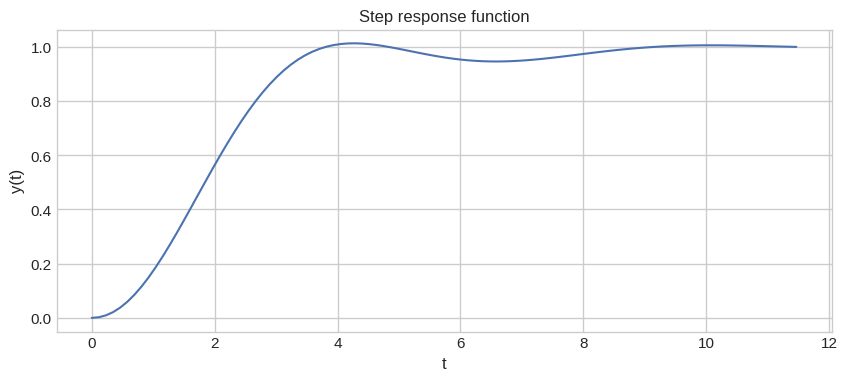

In [3]:
num = [1, 2]
dem = [3, 4, 5, 2]
W = tf(num, dem)
y, t = step(W)

plt.plot(t, y, 'b')
plt.title("Step response function")
plt.ylabel("y(t)")
plt.xlabel("t")
plt.grid(True)

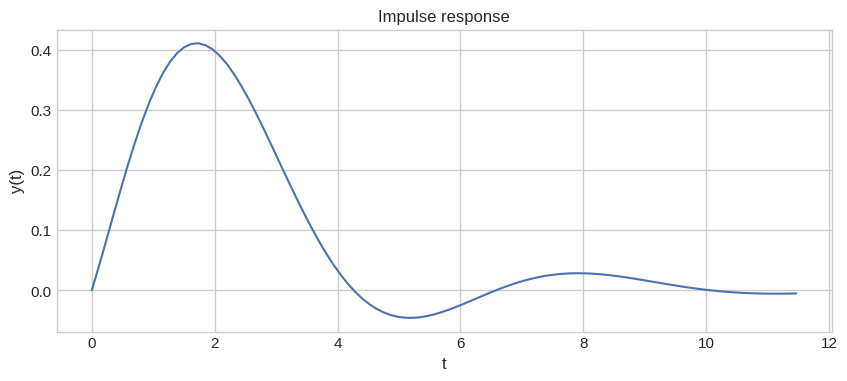

In [4]:
W = tf(num, dem)
y, t = impulse(W)
plt.plot(t, y, 'b')
plt.title("Impulse response")
plt.ylabel("y(t)")
plt.xlabel("t")
plt.grid(True)

### Forced response

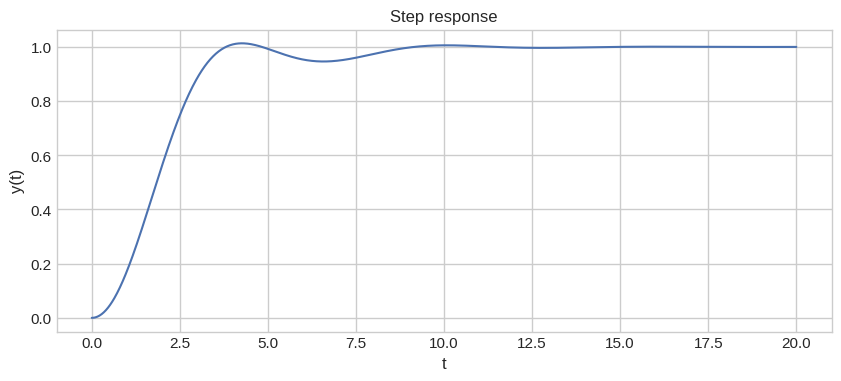

In [5]:
t = np.linspace(0, 20, 1000) # times: t1, t2, ...
u = np.ones((1, len(t))) # input: u(t1), u(t2), ... 
X0 = np.array([[0], [0], [0]]) # initial conditions
t, yout, xout = control.forced_response(W, t, u, X0)
# t - times for responses
# yout - response
# xout - time evolution of the state vector

plt.plot(t, yout, 'b')
plt.title("Step response")
plt.ylabel("y(t)")
plt.xlabel("t")
plt.grid(True)

### Poles and zeros

In [6]:
print("Transfer function: \n",W )
print("Zeros: ", zero(W))
print("Poles: ", pole(W))

Transfer function: 
 
         s + 2
-----------------------
3 s^3 + 4 s^2 + 5 s + 2

Zeros:  [-2.]
Poles:  [-0.39757376+1.03955022j -0.39757376-1.03955022j -0.53818581+0.j        ]


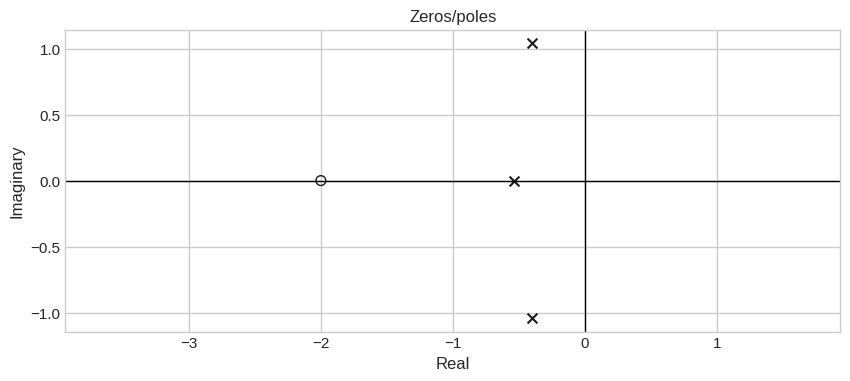

In [7]:
control.pzmap(W, Plot=True, grid=False, title='Zeros/poles');

### Convoluation theorems

$$
y(t) = h(t)x(0) + \int_{0}^{t} h(t-\tau)x'(\tau)d\tau
$$

$$
y(t) = h(0)x(t) + \int_{0}^{t} w(t-\tau)x(\tau)d\tau
$$